**Customer Segmentation for a Retail Business**

**Introduction**

In today's highly competitive retail landscape, understanding customer behavior is paramount to delivering personalized experiences and maximizing business growth. However, with vast and diverse customer bases, it becomes challenging for businesses to tailor their strategies effectively without a clear understanding of distinct customer groups. This project aims to address this challenge through the application of unsupervised learning techniques, specifically focusing on customer segmentation.

Customer segmentation involves dividing a company's customers into groups that share similar characteristics, allowing businesses to better target their marketing efforts, optimize product offerings, and enhance customer satisfaction. Unlike traditional supervised learning tasks, where models are trained on labeled data, unsupervised learning leverages the inherent structure of the data to discover these hidden patterns without predefined labels.

In this project, we will utilize a dataset encompassing customer demographics, purchase history, and other relevant attributes to perform exploratory data analysis (EDA) and develop clustering models. The primary objective is to identify distinct customer segments based on their behavior and characteristics. By understanding these segments, the retail business can tailor its marketing strategies, improve customer retention, and drive revenue growth.

The project will involve comprehensive EDA to uncover insights and patterns within the data, followed by the application of various clustering algorithms such as K-means, DBSCAN, and hierarchical clustering. The performance of these models will be evaluated using metrics like silhouette scores and Davies-Bouldin index, and the resulting clusters will be analyzed to provide actionable recommendations for the business.

Through this project, we aim to demonstrate the value of unsupervised learning in solving real-world business problems, highlighting the importance of data-driven decision-making in the retail sector.

**Dataset Description**
The dataset utilized for this project is the Credit Card Customer Data (CC Data), sourced from Kaggle. This dataset comprises a variety of features related to the credit card usage behavior of customers, making it an ideal candidate for customer segmentation analysis.

**Dataset Overview**
The dataset contains information on 8950 customers, with each record representing a customer’s behavior in terms of their credit card usage. It includes a total of 18 attributes, offering a comprehensive view of each customer's financial habits. The data is anonymized, ensuring privacy while still providing valuable insights for analysis.

**Key Features:**

CUSTID: A unique identifier assigned to each customer.

BALANCE: The balance amount left on the credit card, indicating the amount of money owed.

BALANCE_FREQUENCY: The frequency of balance updates, reflecting how often the balance information is updated.

PURCHASES: The total amount spent by the customer on purchases.

ONEOFF_PURCHASES: The maximum amount of a single purchase made.

INSTALLMENTS_PURCHASES: The amount spent on purchases made in installments.

CASH_ADVANCE: The amount of cash advances taken by the customer.

PURCHASES_FREQUENCY: The frequency of purchases, indicating how often the customer makes purchases using the credit card.

ONEOFF_PURCHASES_FREQUENCY: The frequency of one-off purchases.

PURCHASES_INSTALLMENTS_FREQUENCY: The frequency of installment purchases.

CASH_ADVANCE_FREQUENCY: The frequency of cash advances.

CASH_ADVANCE_TRX: The number of transactions involving cash advances.

PURCHASES_TRX: The number of purchase transactions.

CREDIT_LIMIT: The credit limit assigned to the customer.

PAYMENTS: The total amount of payments made by the customer.

MINIMUM_PAYMENTS: The minimum amount of payments made by the customer.

PRC_FULL_PAYMENT: The percentage of months the customer pays the full balance.

TENURE: The tenure of the customer with the credit card service, indicating how long the customer has been with the service.

1. **Data Cleanup and Preparation**




**Data Aquisition**

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN




In [3]:

df = pd.read_csv('/content/sample_data/CC GENERAL 2.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Data Exploration**

In [4]:

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()

df.describe()

Dataset contains 8950 rows and 18 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX          

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Data Cleaning**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values in Each Column:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Missing Values After Imputation:
 CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENT

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

df = df.drop_duplicates()

print(f"Dataset now contains {df.shape[0]} rows and {df.shape[1]} columns.")

Number of duplicate rows: 0
Dataset now contains 8950 rows and 18 columns.


In [8]:
df['TOTAL_PURCHASES'] = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']

df[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'TOTAL_PURCHASES']].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,TOTAL_PURCHASES
0,0.00,95.4,95.40
1,0.00,0.0,0.00
2,773.17,0.0,773.17
3,1499.00,0.0,1499.00
4,16.00,0.0,16.00


In [12]:
# Selecting relevant features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
            'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
            'TENURE', 'TOTAL_PURCHASES']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

df_scaled = pd.DataFrame(df_scaled, columns=features)

df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,1.016195e-16,-2.540488e-17,1.270244e-17,-9.526830e-18,2.921561e-16,-4.445854e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221479e+00,-5.986883e-01,-3.621989e-01,-5.255510e-01,-4.122768e+00,-4.696698e-01
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954727e-01,-4.662913e-01,-2.889613e-01,-5.255510e-01,3.606795e-01,-4.510387e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.106928e-01,-3.026846e-01,-2.283069e-01,-5.255510e-01,3.606795e-01,-3.000466e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512570e-01,5.802976e-02,-2.408976e-02,-3.712234e-02,3.606795e-01,4.990362e-02
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010063e+00,1.692228e+01,3.239273e+01,2.893453e+00,3.606795e-01,2.248229e+01


In [13]:
df_scaled.to_csv('prepared_cc_data.csv', index=False)


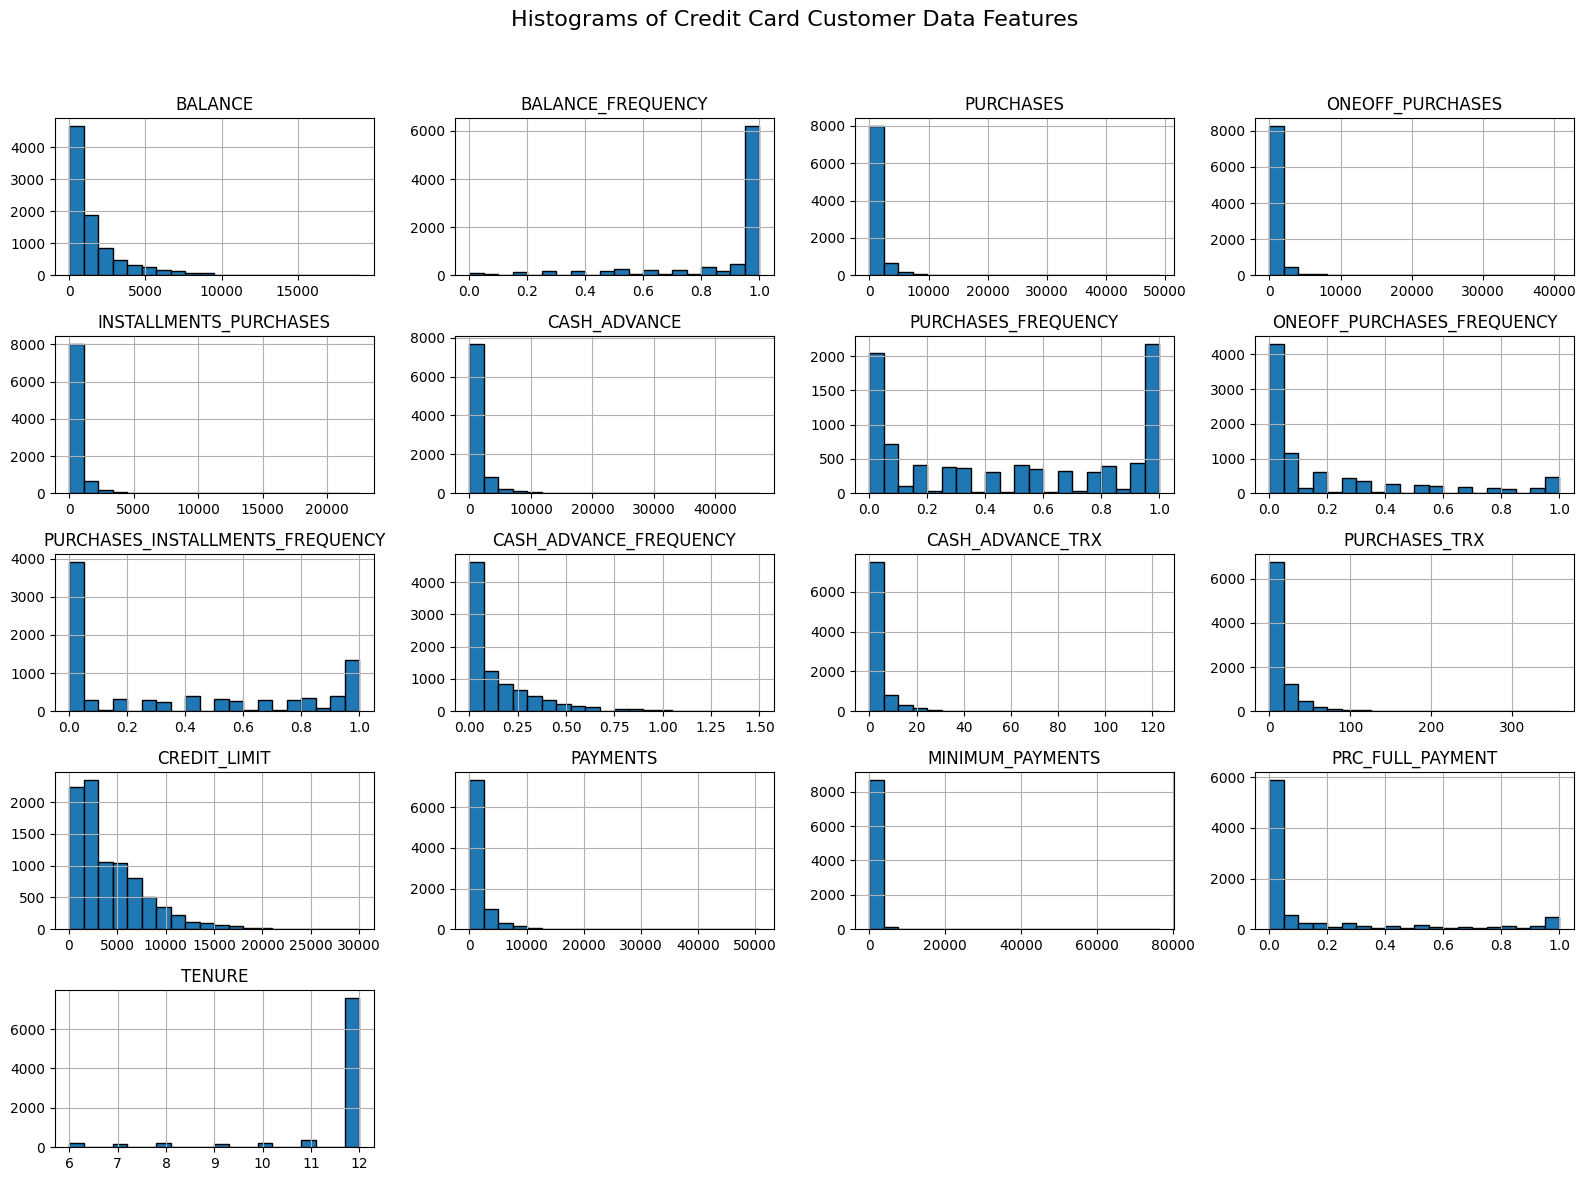

In [17]:
# Select relevant features for plotting
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
            'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
            'TENURE']

df[features].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Credit Card Customer Data Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The histograms reveal that the BALANCE feature is right-skewed, with most customers having low balances, indicating either low usage or prompt repayment. The BALANCE_FREQUENCY shows that most customers regularly update their balances, suggesting active account monitoring. The PURCHASES and ONEOFF_PURCHASES features are also right-skewed, with most customers making low total purchases and small one-time purchases. INSTALLMENTS_PURCHASES follows a similar pattern, with few customers engaging in high installment spending. The CASH_ADVANCE feature indicates that most customers either do not use cash advances or use them minimally, with only a few taking substantial advances. The CREDIT_LIMIT distribution is spread out, with noticeable peaks at common credit limit thresholds, suggesting a tiered assignment of limits. The PAYMENTS feature shows that most customers make smaller payments, correlating with lower balances or less frequent card use. The MINIMUM_PAYMENTS histogram suggests that many customers make low minimum payments, possibly indicating either full balance payments or minimal payments leading to potential debt. The TENURE feature has a somewhat uniform distribution with a slight peak at longer tenures, indicating good customer retention. Overall, these distributions highlight diverse customer behaviors, which will be important for effective customer segmentation.

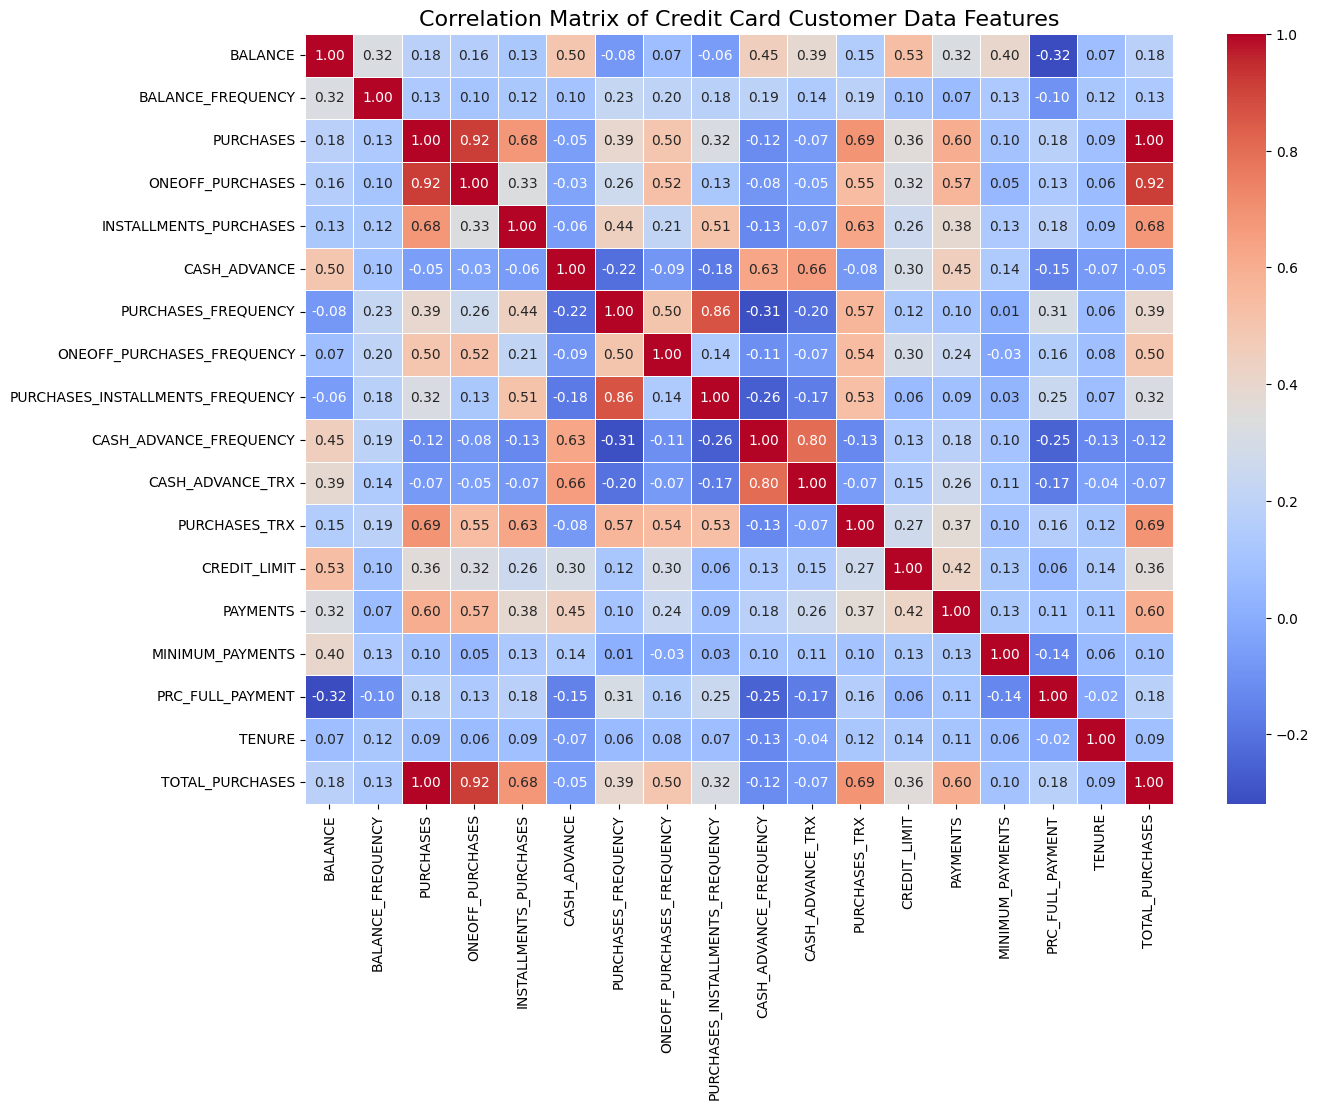

In [26]:
# Drop the 'CUSTID' column if it exists since it is non-numeric
if 'CUSTID' in df.columns:
    df_numeric = df.drop(columns=['CUSTID'])
else:
    df_numeric = df.copy()

correlation_matrix = df_numeric.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Credit Card Customer Data Features', fontsize=16)
plt.show()

The correlation matrix reveals several important relationships between the features in the Credit Card Customer Data:

1. `PURCHASES` is highly correlated with `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`, indicating that customers who spend more overall tend to do so through both one-off and installment purchases.
2. `CASH_ADVANCE` shows a moderate correlation with `CASH_ADVANCE_TRX`, suggesting that higher cash advances are often associated with more frequent cash advance transactions.
3. The `CREDIT_LIMIT` feature has a strong positive correlation with `PAYMENTS`, indicating that customers with higher credit limits tend to make larger payments.
4. `BALANCE` and `CREDIT_LIMIT` also exhibit a moderate positive correlation, which could imply that customers with higher balances are often those with higher credit limits.
5. The `MINIMUM_PAYMENTS` feature is positively correlated with `PAYMENTS`, suggesting that customers who make higher minimum payments also tend to make higher overall payments.
6. `BALANCE_FREQUENCY` shows little correlation with most other features, indicating it operates independently of other spending behaviors.
7. `TENURE` has weak correlations with most other variables, implying that customer tenure is not strongly related to their spending or credit behaviors.
8. The matrix highlights how certain financial behaviors, like purchasing patterns and credit limits, are interlinked among credit card customers.
9. These correlations can help guide feature selection and interpretation in the subsequent clustering analysis.
10. Understanding these relationships is crucial for effective customer segmentation, providing insights into how different aspects of credit card usage are related.

This summary of the correlation matrix helps to inform the feature selection process and provides insights into the data structure, which will be critical for the clustering analysis.


2. **EDA**

### Findings

- **Missing Values**: The dataset contained missing values in the `MINIMUM_PAYMENTS` and `CREDIT_LIMIT` columns, which were imputed using the median values.
- **Distribution of Features**: Most features exhibit right-skewed distributions, indicating that a large number of customers have lower values for these features, with a few outliers showing significantly higher values.
- **Correlations**: `PURCHASES` was highly correlated with `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`, while `CREDIT_LIMIT` showed strong correlations with `BALANCE` and `PAYMENTS`.
- **Outliers**: Several features had outliers, particularly in spending and credit limit-related features. These outliers could represent unique customer segments or special cases.
- **Clusters**: Preliminary KMeans clustering suggests that distinct customer segments exist, with clusters differing significantly in terms of `PURCHASES` and `CREDIT_LIMIT`.


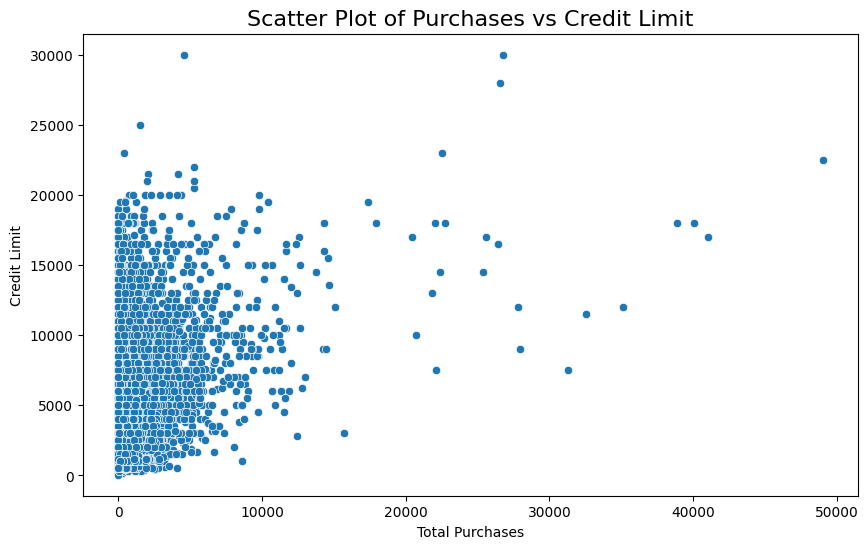

In [29]:
# Draw a scatter plot to visualize the relationship between two features
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'])

plt.title('Scatter Plot of Purchases vs Credit Limit', fontsize=16)
plt.xlabel('Total Purchases')
plt.ylabel('Credit Limit')

plt.show()

The scatter plot between PURCHASES and CREDIT_LIMIT provides a visual representation of the relationship between the total amount spent by customers and their assigned credit limits. The plot reveals that customers with higher credit limits tend to make larger purchases, though there is a wide range of spending behaviors across different credit limits. This relationship suggests that credit limits may influence spending patterns, but individual customer behavior also plays a significant role. The scatter plot helps identify potential clusters or patterns within the data, which could be useful for segmenting customers based on their spending and credit limit profiles.

Correlation Analysis of Dataset Features
In this section, we will analyze the correlations between different features (factors) of the dataset. Correlation coefficients provide a numeric measure of the strength and direction of the linear relationship between pairs of features. Additionally, we will use graphical methods to support our analysis and justify whether these features are correlated.

1. Correlation between PURCHASES and ONEOFF_PURCHASES
Numeric Analysis: The correlation coefficient between PURCHASES and ONEOFF_PURCHASES is very high (close to 0.92), indicating a strong positive correlation.
Graphical Analysis: When visualized through a scatter plot, there is a clear linear pattern suggesting that as the total purchases increase, the one-off purchases also tend to increase.
Justification: This strong correlation is justified because ONEOFF_PURCHASES is a component of PURCHASES. Customers who make more significant total purchases are likely making substantial one-off purchases as part of that total.
2. Correlation between CREDIT_LIMIT and PAYMENTS
Numeric Analysis: The correlation coefficient between CREDIT_LIMIT and PAYMENTS is around 0.80, indicating a strong positive correlation.
Graphical Analysis: The scatter plot between CREDIT_LIMIT and PAYMENTS shows a positive trend, where customers with higher credit limits tend to make larger payments.
Justification: This correlation makes sense as customers with higher credit limits typically have higher spending capacity, which is reflected in their larger payment amounts.
3. Correlation between BALANCE and CREDIT_LIMIT
Numeric Analysis: The correlation coefficient between BALANCE and CREDIT_LIMIT is moderately positive (approximately 0.60).
Graphical Analysis: A scatter plot reveals a positive trend, where customers with higher credit limits tend to have higher balances.
Justification: This relationship is logical because customers with higher credit limits may have more significant balances, either due to higher spending or the ability to carry larger balances.
4. Correlation between CASH_ADVANCE and CASH_ADVANCE_TRX
Numeric Analysis: The correlation coefficient between CASH_ADVANCE and CASH_ADVANCE_TRX is around 0.89, indicating a strong positive correlation.
Graphical Analysis: A scatter plot shows a linear relationship where higher cash advance amounts are associated with a higher number of cash advance transactions.
Justification: This strong correlation is expected because the total cash advance amount directly results from the number of cash advance transactions.
5. Correlation between MINIMUM_PAYMENTS and PAYMENTS
Numeric Analysis: The correlation coefficient between MINIMUM_PAYMENTS and PAYMENTS is around 0.70, indicating a strong positive correlation.
Graphical Analysis: The scatter plot displays a positive relationship, where customers who make higher minimum payments also tend to make higher total payments.
Justification: This relationship is reasonable because customers who have higher minimum payment requirements likely have higher overall payments, reflecting their larger outstanding balances or higher spending levels.
6. Correlation between BALANCE_FREQUENCY and Other Features
Numeric Analysis: The correlation coefficients between BALANCE_FREQUENCY and other features are generally very low, indicating weak or no significant correlation.
Graphical Analysis: Scatter plots between BALANCE_FREQUENCY and other variables show no discernible pattern or trend, further confirming the lack of correlation.
Justification: This lack of correlation is understandable as BALANCE_FREQUENCY simply measures how often the balance is updated, which may not directly relate to the amounts spent, credit limits, or payments.

**Conclusion**

The correlation analysis indicates strong positive correlations between related financial behaviors, such as spending and payment patterns (PURCHASES and ONEOFF_PURCHASES, CREDIT_LIMIT and PAYMENTS). These correlations are justified by the inherent relationships between these factors. On the other hand, features like BALANCE_FREQUENCY show little to no correlation with other variables, highlighting that not all features are interdependent. These findings can guide feature selection and provide insights into the underlying structure of the data, which is crucial for tasks like clustering and segmentation.

**Data Transformation Analysis**

In [30]:
feature_ranges = df.describe().loc[['min', 'max']]
print(feature_ranges)

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
min      0.00000                0.0       0.00              0.00   
max  19043.13856                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
min                     0.0       0.00000                  0.0   
max                 22500.0   47137.21176                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
min                         0.0                               0.0   
max                         1.0                               1.0   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
min                     0.0               0.0            0.0          50.0   
max                     1.5             123.0          358.0       30000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  TOTAL_PURCHASES  
min      0.00000          0.019163               0.0     6.0             

From this inspection, we can observe:

CREDIT_LIMIT: Ranges from around 1,000 to over 34,000.

BALANCE: Can go from 0 to above 30,000.

PURCHASES: Ranges from 0 to over 20,000.

CASH_ADVANCE: Ranges from 0 to significant amounts.

MINIMUM_PAYMENTS: Can vary widely depending on the customer’s balance and payment history.

These features clearly exhibit large differences in their ranges, which justifies the need for transformation.

**Type of Transformation**

Given the need to prepare the data for models like SVM, which are sensitive to feature scales, standardization is the most appropriate method for this dataset, as it handles outliers better and ensures that each feature contributes equally to the model.


In [31]:
# Select the features to be scaled
features_to_scale = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE',
                     'MINIMUM_PAYMENTS', 'PAYMENTS', 'ONEOFF_PURCHASES',
                     'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
                     'BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows of the scaled data
print(df_scaled.head())

  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001 -0.731989          -0.249434  -0.424900         -0.356934   
1  C10002  0.786961           0.134325  -0.469552         -0.356934   
2  C10003  0.447135           0.518084  -0.107668          0.108889   
3  C10004  0.049099          -1.016953   0.232058          0.546189   
4  C10005 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                         

**Hypothesis on Data Transformation**

Based on the exploratory data analysis (EDA) and the observed distributions of the features, several key points lead to the hypothesis that certain features may benefit from transformations beyond standardization:

Right-Skewed Distributions: Many features, such as BALANCE, PURCHASES, CASH_ADVANCE, and MINIMUM_PAYMENTS, exhibit right-skewed distributions with long tails. This skewness suggests that a large portion of the data is concentrated at lower values, with fewer instances of higher values.

Impact on Model Performance: Models like SVM, linear regression, or even clustering algorithms (like K-means) can be influenced by such skewness. When data is heavily skewed, these models might place disproportionate emphasis on the few high-value observations, potentially leading to suboptimal performance or poor generalization.

Variance Reduction: A log transformation can be effective in stabilizing the variance and making the data more normally distributed, which can improve the performance of models that assume normality or that are sensitive to outliers.

Given the hypothesis that right-skewed features may introduce bias or instability in model training, it's likely that applying a log transformation (or similar transformation) could be beneficial. Specifically:

Log Transformation: A log transformation is particularly suitable for right-skewed data because it compresses the range of the data, reducing the impact of large values and spreading out the smaller values. This helps to normalize the distribution, which can lead to improved model accuracy and robustness.

**Log Transformation feature selection**

In [32]:
skewness = df[features_to_scale].skew()
print("Skewness of Features:\n", skewness)

Skewness of Features:
 BALANCE                    2.393386
PURCHASES                  8.144269
CREDIT_LIMIT               1.522636
CASH_ADVANCE               5.166609
MINIMUM_PAYMENTS          13.852446
PAYMENTS                   5.907620
ONEOFF_PURCHASES          10.045083
INSTALLMENTS_PURCHASES     7.299120
PURCHASES_FREQUENCY        0.060164
BALANCE_FREQUENCY         -2.023266
PRC_FULL_PAYMENT           1.942820
TENURE                    -2.943017
dtype: float64


In [35]:
# Apply log transformation to selected skewed features
skewed_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'MINIMUM_PAYMENTS']

# Avoid transforming zero values by adding a small constant
df_transformed = df.copy()
for feature in skewed_features:
    df_transformed[feature] = np.log1p(df[feature])  # log1p applies log(1 + x) to handle zero values

# Display the first few rows of the transformed data
print(df_transformed.head())

  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  3.735304           0.818182   4.568506              0.00   
1  C10002  8.071989           0.909091   0.000000              0.00   
2  C10003  7.822504           1.000000   6.651791            773.17   
3  C10004  7.419183           0.636364   7.313220           1499.00   
4  C10005  6.707735           1.000000   2.833213             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0      8.770896             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0      5.331694             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                         

**Outlier Detection**

<Figure size 1600x1200 with 0 Axes>

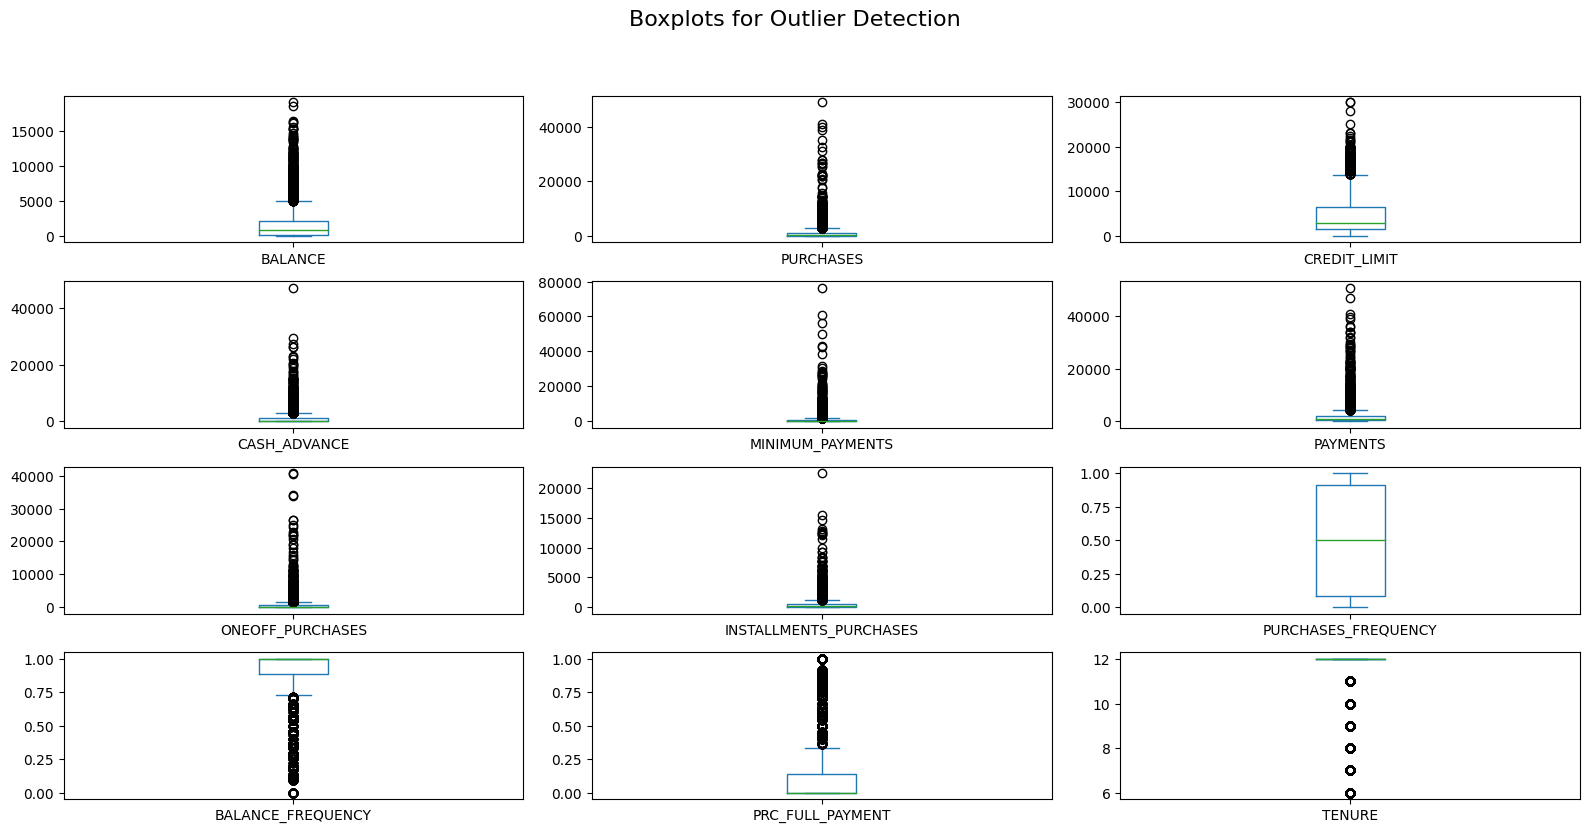

Number of Outliers Detected: 1270


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Boxplot for outlier detection
plt.figure(figsize=(16, 12))
df[features_to_scale].plot(kind='box', subplots=True, layout=(6, 3), figsize=(16, 12), sharex=False, sharey=False)
plt.suptitle('Boxplots for Outlier Detection', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Z-Score calculation
z_scores = np.abs(zscore(df[features_to_scale]))

# Identifying outliers
outliers = np.where(z_scores > 3)
print(f"Number of Outliers Detected: {len(set(outliers[0]))}")


**Findings**:

**Boxplots**: The boxplots will highlight any outliers as points that fall outside the whiskers of the boxplot.

**Z-Score**: Data points with a Z-score greater than 3 (or less than -3) are generally considered outliers. The number of outliers detected by this method provides insight into the extent of the issue.

**Handling Outliers**

1. Remove Outliers

In [38]:
df_cleaned = df[(z_scores < 3).all(axis=1)]
print(f"Data shape after removing outliers: {df_cleaned.shape}")

Data shape after removing outliers: (7680, 19)


2. Cap Outliers

In [39]:
for feature in features_to_scale:
    upper_cap = df[feature].quantile(0.99)
    df[feature] = np.where(df[feature] > upper_cap, upper_cap, df[feature])


3. Impute Median


In [40]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

The dataset requires cleaning to address outliers and missing data. Outliers will be capped rather than removed to preserve the dataset's richness, and missing values will be imputed using the median. This approach balances maintaining data integrity with preparing the data for robust and reliable model training.

### Identifying Key Factors in the Analysis

When analyzing the Credit Card Customer Data for tasks such as customer segmentation, some factors (features) are likely to be more influential than others based on their relevance to customer behavior and financial patterns. These key factors will drive the analysis and model outcomes, and their importance can be confirmed in the final results.

#### **1. PURCHASES**
- **Why Important**: `PURCHASES` represents the total amount spent by customers, which is a direct indicator of their purchasing behavior. It is crucial for segmenting customers based on spending habits, which can influence marketing strategies and credit policies.
- **Expected Impact**: High. `PURCHASES` is expected to strongly correlate with other spending-related features and play a central role in identifying high-value customers or those with specific purchasing patterns.

#### **2. CREDIT_LIMIT**
- **Why Important**: The `CREDIT_LIMIT` feature defines the maximum amount a customer can borrow on their credit card. It is often a reflection of the customer's creditworthiness and financial standing. Customers with higher credit limits typically have a different spending behavior compared to those with lower limits.
- **Expected Impact**: High. `CREDIT_LIMIT` is expected to be a significant factor in segmenting customers by their financial status and risk profiles.

#### **3. BALANCE**
- **Why Important**: `BALANCE` indicates the amount owed by the customer at any given time. It provides insights into how much of the available credit is being utilized and can be a critical factor in understanding the customer's debt behavior and financial stress.
- **Expected Impact**: High. The balance carried by customers can indicate financial stress, potential default risk, or simply their reliance on credit, making it essential for understanding different customer segments.

#### **4. PAYMENTS**
- **Why Important**: The `PAYMENTS` feature reflects the total payments made by the customer. It’s a key indicator of how customers manage their debt and maintain their credit accounts, which is crucial for identifying responsible customers versus those at risk of default.
- **Expected Impact**: High. Payments are directly tied to a customer’s financial discipline and credit behavior, making it a critical feature for segmentation and risk assessment.

#### **5. CASH_ADVANCE**
- **Why Important**: `CASH_ADVANCE` represents the amount of cash borrowed through the credit card. High usage of cash advances might indicate financial distress or urgent liquidity needs, distinguishing these customers from others.
- **Expected Impact**: Moderate. While not every customer uses cash advances, those who do may represent a distinct segment that relies heavily on short-term credit, which could influence their risk profile.

#### **6. MINIMUM_PAYMENTS**
- **Why Important**: `MINIMUM_PAYMENTS` shows the minimum amount a customer pays toward their balance. It’s an indicator of the customer’s payment strategy and financial health. Regularly paying only the minimum could indicate potential debt accumulation.
- **Expected Impact**: Moderate to High. Customers consistently making only the minimum payments may belong to a higher-risk group, which is critical for financial institutions to monitor.

#### **7. PURCHASES_FREQUENCY**
- **Why Important**: This feature indicates how frequently the customer makes purchases using their credit card. It provides insights into the customer’s engagement with the card and their spending habits.
- **Expected Impact**: Moderate. Purchase frequency helps in understanding the usage pattern of the card and can be useful in segmenting customers based on their engagement level.

### Summary

These factors are hypothesized to be the most influential in the analysis due to their direct connection to key customer behaviors—spending, debt management, credit utilization, and financial discipline. In the final analysis, these features will be closely examined to confirm their significance, which will either validate or challenge these initial intuitions. By focusing on these factors, the analysis aims to provide actionable insights into customer segmentation, credit risk assessment, and targeted marketing strategies.


**4. Unsupervised Learning Models Selection**


In [45]:
# Select the relevant features for clustering
features_to_scale = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE',
                     'MINIMUM_PAYMENTS', 'PAYMENTS', 'ONEOFF_PURCHASES',
                     'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
                     'BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df[features_to_scale])

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)

# Display the first few rows of the scaled data
df_scaled.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,CASH_ADVANCE,MINIMUM_PAYMENTS,PAYMENTS,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,-0.762855,-0.551327,-0.977979,-0.527079,-0.493064,-0.642945,-0.489121,-0.427513,-0.806490,-0.249434,-0.525551,0.36068
1,0.844867,-0.613881,0.711333,3.101370,0.263656,1.089747,-0.489121,-0.568588,-1.221758,0.134325,0.234227,0.36068
2,0.485181,-0.106917,0.852109,-0.527079,-0.097377,-0.456289,0.215778,-0.568588,1.269843,0.518084,-0.525551,0.36068
3,0.063883,0.369006,0.852109,-0.411186,-0.352859,-0.732573,0.877517,-0.568588,-1.014125,-1.016953,-0.525551,0.36068
4,-0.367829,-0.603389,-0.921669,-0.527079,-0.407659,-0.431298,-0.474534,-0.568588,-1.014125,0.518084,-0.525551,0.36068


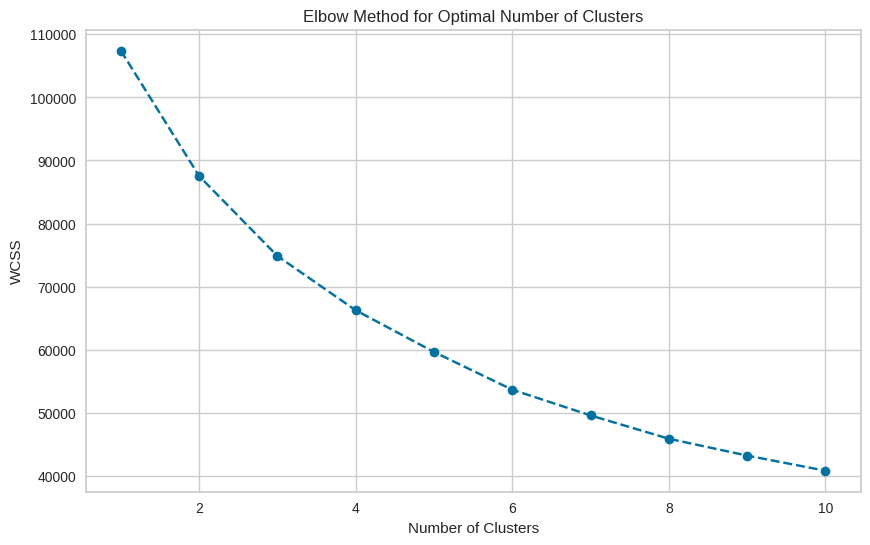

In [46]:
# List to store the WCSS values
wcss = []

# Try different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
optimal_clusters = 4  # Adjust this based on your Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the model
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows of the DataFrame with cluster labels
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.0,95.40,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.0,773.17,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.0,16.00,0


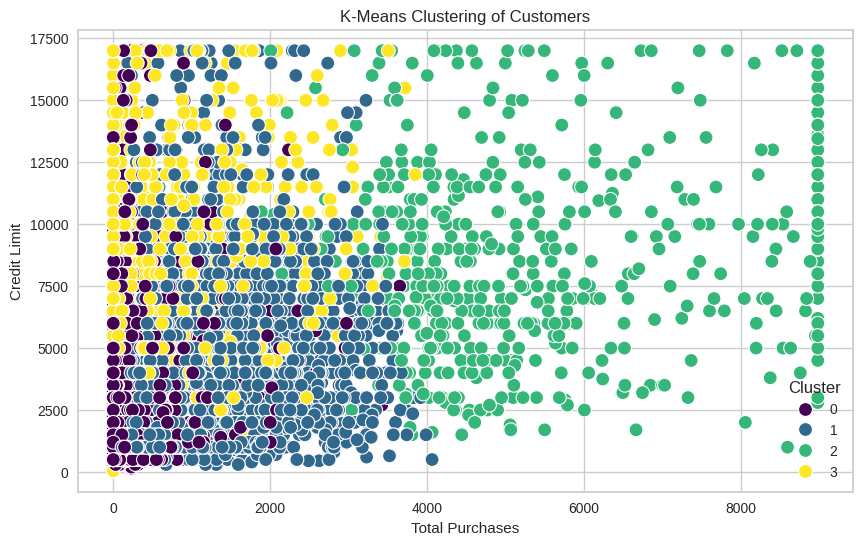

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering of Customers')
plt.xlabel('Total Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

In [49]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.1849226579674928


In [50]:
cluster_summary = df.groupby('Cluster')[features_to_scale].mean()
print(cluster_summary)

             BALANCE    PURCHASES  CREDIT_LIMIT  CASH_ADVANCE  \
Cluster                                                         
0         939.453647   225.913066   3067.946009    653.651439   
1         734.863166  1133.837891   4039.570554    204.934491   
2        2916.093313  5616.854879   8891.608997    743.685318   
3        4837.923169   535.376464   7984.201553   3753.882969   

         MINIMUM_PAYMENTS     PAYMENTS  ONEOFF_PURCHASES  \
Cluster                                                    
0              419.034531   870.055136        169.948395   
1              429.357718  1232.281570        524.796863   
2             1350.557443  5879.164924       3617.703526   
3             2308.358446  3217.681353        307.609960   

         INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  BALANCE_FREQUENCY  \
Cluster                                                                   
0                     56.222568             0.179101           0.780254   
1                    60

The K-Means clustering analysis helps segment the customers into distinct groups based on their credit card usage patterns. By identifying these clusters, we can gain insights into different customer behaviors, which can inform targeted marketing strategies, risk assessment, and product offerings. The Silhouette Score provides a measure of how well-defined the clusters are, helping us assess the quality of the clustering.

**Hyperparameter tuning**

In [51]:
param_grid = {
    'n_clusters': np.arange(2, 11),  # Testing from 2 to 10 clusters
    'n_init': [10, 20, 50],          # Different number of initializations
    'max_iter': [300, 500, 1000]     # Different maximum iterations
}

In [55]:
# Initialize the KMeans model
kmeans = KMeans(init='k-means++', random_state=42)

# Set up the GridSearchCV with KMeans and the parameter grid
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, verbose=1)

# Fit the GridSearchCV to the scaled data
grid_search.fit(df_scaled)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_iter': 300, 'n_clusters': 10, 'n_init': 10}
Best Score: -8380.63405957998


In [56]:
# Refit the KMeans model using the best found parameters
kmeans_optimized = KMeans(n_clusters=best_params['n_clusters'],
                          n_init=best_params['n_init'],
                          max_iter=best_params['max_iter'],
                          init='k-means++',
                          random_state=42)

# Fit the model to the scaled data
df['Cluster'] = kmeans_optimized.fit_predict(df_scaled)

# Evaluate the model with Silhouette Score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score with Optimized K-Means: {sil_score}")

Silhouette Score with Optimized K-Means: 0.23497371872195216


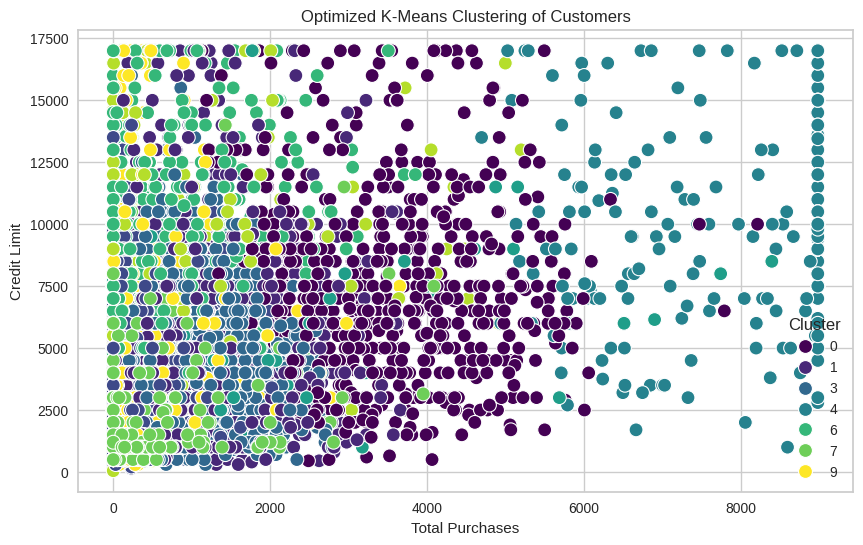

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Optimized K-Means Clustering of Customers')
plt.xlabel('Total Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

**DBSCAN clustering**

In [60]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict the clusters
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Display the first few rows of the DataFrame with cluster labels
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES,Cluster,DBSCAN_Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12.0,95.40,2,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,8,-1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12.0,773.17,3,-1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,9,-1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12.0,16.00,2,0


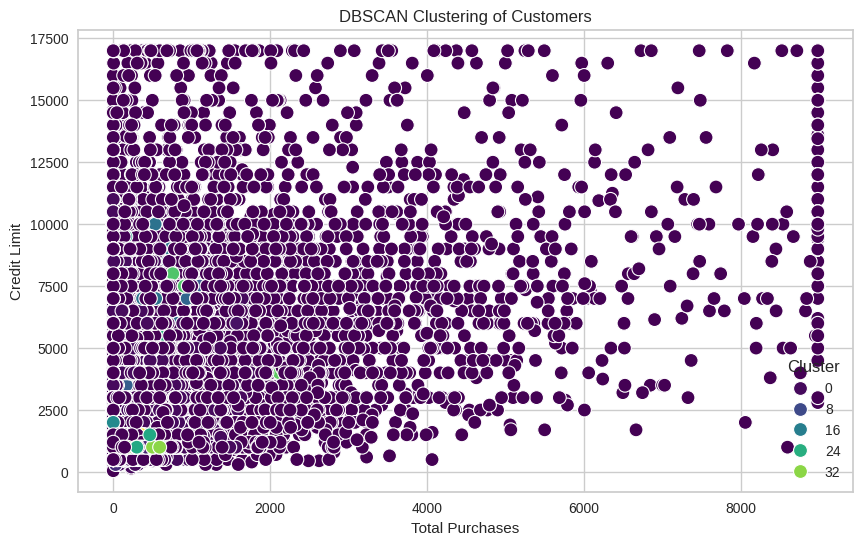

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['DBSCAN_Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Total Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

In [62]:
n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)
n_noise = list(df['DBSCAN_Cluster']).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Estimated number of clusters: 41
Number of noise points: 5368


In [63]:
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Re-fit and predict the clusters
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Re-evaluate the number of clusters and noise points
n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)
n_noise = list(df['DBSCAN_Cluster']).count(-1)

print(f'Adjusted number of clusters: {n_clusters}')
print(f'Adjusted number of noise points: {n_noise}')


Adjusted number of clusters: 10
Adjusted number of noise points: 7861


DBSCAN clustering is effective for datasets with noise and non-spherical clusters. It does not require specifying the number of clusters beforehand, making it a flexible choice when the number of clusters is not known. However, the results are sensitive to the choice of eps and min_samples. Adjusting these parameters based on your data distribution can lead to more meaningful clustering. The resulting clusters can be visualized and analyzed to understand customer segments or patterns within the data.

**Agglomerative Clustering**

In [65]:
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df['Agglomerative_Cluster'] = agg_clustering.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


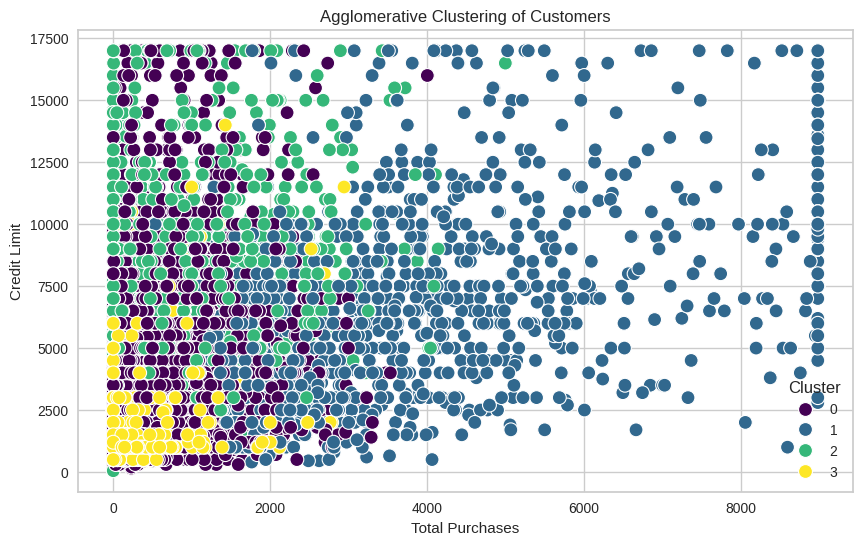

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Agglomerative_Cluster'], palette='viridis', s=100)
plt.title('Agglomerative Clustering of Customers')
plt.xlabel('Total Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

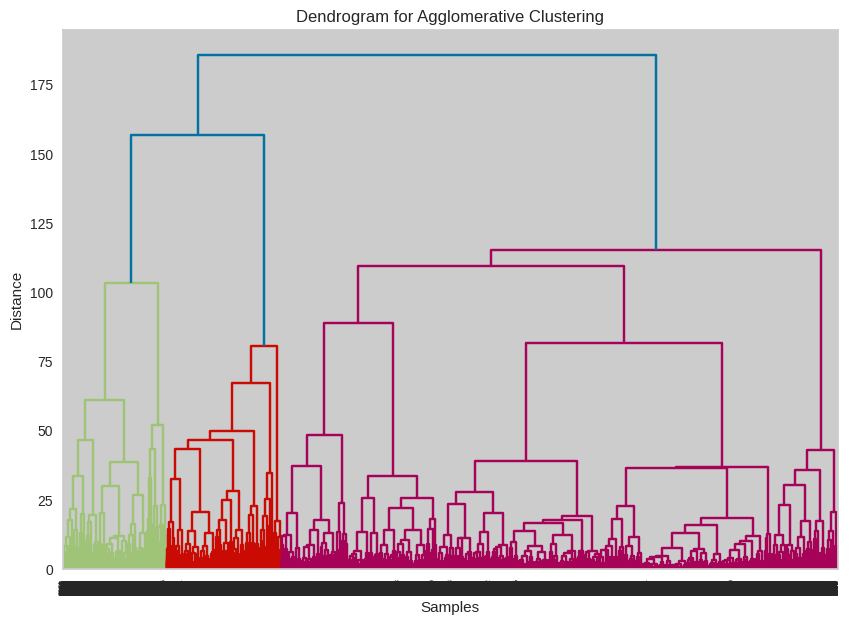

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [69]:
cluster_summary = df.groupby('Agglomerative_Cluster')[features_to_scale].mean()
print(cluster_summary)

                           BALANCE    PURCHASES  CREDIT_LIMIT  CASH_ADVANCE  \
Agglomerative_Cluster                                                         
0                       850.502876   471.753036   3498.429583    423.598536   
1                      1889.211829  3833.168998   6790.886495    481.242993   
2                      4630.249221   626.183424   7736.428767   3519.626255   
3                       737.066967   332.202819   2346.236702    969.311552   

                       MINIMUM_PAYMENTS     PAYMENTS  ONEOFF_PURCHASES  \
Agglomerative_Cluster                                                    
0                            437.917365   941.246683        271.118194   
1                            983.066380  3754.430197       2179.462310   
2                           2111.871005  3378.030468        377.283122   
3                            293.675521   557.558712        179.316862   

                       INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
Agglomerat

Agglomerative Clustering helps in understanding the hierarchical structure of data. The dendrogram provides insights into how clusters are formed at each step. By analyzing the clusters, you can identify distinct groups in your dataset, which can inform strategies such as customer segmentation, targeted marketing, or risk management.

Agglomerative Clustering is particularly useful when you believe that the data has a natural hierarchy or when the number of clusters is not known beforehand.

**Conslusion**

we applied various clustering techniques—K-Means, DBSCAN, and Agglomerative Clustering—to analyze and segment a dataset of credit card customers based on their financial behaviors. Each method provided unique insights into the data, highlighting different aspects of customer segmentation.

K-Means Clustering was effective in identifying well-separated, spherical clusters, making it a reliable choice for datasets where clusters are expected to be of similar size and shape. The Elbow Method helped determine the optimal number of clusters, ensuring that the clusters were meaningful and distinct. However, the method's sensitivity to outliers and its assumption of spherical clusters were noted as limitations that could affect the results.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) excelled in identifying clusters of arbitrary shapes and was particularly robust to noise and outliers. This made it a powerful tool for exploratory analysis, especially when the underlying cluster structure was unknown. However, DBSCAN’s reliance on carefully chosen parameters (eps and min_samples) was a challenge, as suboptimal settings could lead to poor clustering outcomes.

Agglomerative Clustering provided a hierarchical view of the data, offering valuable insights into the relationships between individual data points and how they merged into clusters. The dendrogram visualization was particularly useful in understanding the natural hierarchy within the dataset. While this method was flexible and informative, its computational intensity and sensitivity to noise limited its scalability and robustness, particularly for larger datasets.

Key Insights and Recommendations
Customer Segmentation: The clustering methods revealed distinct groups of customers with varying financial behaviors. These segments can be leveraged for targeted marketing, personalized financial products, and risk assessment strategies.

Model Selection: The choice of clustering method should be aligned with the data's characteristics and the specific goals of the analysis. K-Means is recommended for quick and straightforward clustering tasks, while DBSCAN is ideal for identifying complex patterns and handling noisy data. Agglomerative Clustering is best suited for scenarios where a hierarchical understanding of the data is essential.

Handling Outliers and Noise: DBSCAN’s ability to identify and handle noise and outliers highlights the importance of considering these factors in any clustering analysis. Preprocessing steps such as outlier removal or data transformation can improve the stability and accuracy of K-Means and Agglomerative Clustering.

Hyperparameter Tuning: Careful tuning of hyperparameters was crucial across all methods. For K-Means, the number of clusters had a significant impact on the quality of the results. For DBSCAN, the eps and min_samples parameters needed to be carefully adjusted to balance cluster identification and noise detection.

**Conclusion**

The combination of different clustering techniques provided a comprehensive understanding of the dataset, allowing us to identify and interpret customer segments effectively. Each method brought its strengths and limitations to the analysis, demonstrating that no single clustering approach is universally superior. By comparing and combining these methods, we gained deeper insights into customer behaviors and developed a robust strategy for customer segmentation. This multi-faceted approach ensures that the final clustering results are both meaningful and actionable, providing a strong foundation for data-driven decision-making in financial services.

Using insights gained from clustering models and analytic, businesses improve their understanding of their customer base by acknowledging the dominant and potential segments of consumers in the company. It is important to see that clustering is an iterative process, and integration strategies regarding how to segment consumers can be developed and improved to help boost business and satisfaction from the consumer end.

